<a href="https://colab.research.google.com/github/jaisonjames0006/ML/blob/main/Car_resale_value_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('train-data.csv')
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
df['Fuel_Type'].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [ ]:
df['Location'].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

In [ ]:
df['Transmission'].value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

In [ ]:
df['Name'].value_counts()

Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1878, dtype: int64

In [ ]:
df['Engine'].value_counts()

1197 CC    606
1248 CC    512
1498 CC    304
998 CC     259
2179 CC    240
          ... 
2999 CC      1
2147 CC      1
2495 CC      1
3200 CC      1
1797 CC      1
Name: Engine, Length: 146, dtype: int64

In [ ]:
df['Owner_Type'].value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [ ]:
df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [ ]:
df.shape

(6019, 13)

In [ ]:
df.drop(['New_Price'],axis=1,inplace=True)

In [ ]:
dummy=pd.get_dummies(df[['Location','Fuel_Type','Transmission','Owner_Type']],drop_first=True)
dummy

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
6015,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
6016,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
6017,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0


In [ ]:
dfe=pd.concat([df,dummy],axis=1)
dfe.drop(['Location','Fuel_Type','Transmission','Owner_Type'],axis=1,inplace=True)
dfe

,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,Maruti Wagon R LXI CNG,2010,72000,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,0,0,...,1,0,0,0,0,0,1,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,0,0,...,0,1,1,0,0,0,1,0,0,0
2,Honda Jazz V,2011,46000,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,0,1,...,0,0,0,0,0,1,1,0,0,0
3,Maruti Ertiga VDI,2012,87000,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,0,1,...,0,0,1,0,0,0,1,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,2014,27365,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,0,0,...,0,0,1,0,0,0,1,0,0,0
6015,Hyundai Xcent 1.1 CRDi S,2015,100000,24.4 kmpl,1120 CC,71 bhp,5.0,4.00,0,0,...,0,0,1,0,0,0,1,0,0,0
6016,Mahindra Xylo D4 BSIV,2012,55000,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,0,0,...,0,0,1,0,0,0,1,0,1,0
6017,Maruti Wagon R VXI,2013,46000,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,0,0,...,0,0,0,0,0,1,1,0,0,0


In [ ]:
dfe.dtypes

Name                          object
Year                           int64
Kilometers_Driven              int64
Mileage                       object
Engine                        object
Power                         object
Seats                        float64
Price                        float64
Location_Bangalore             uint8
Location_Chennai               uint8
Location_Coimbatore            uint8
Location_Delhi                 uint8
Location_Hyderabad             uint8
Location_Jaipur                uint8
Location_Kochi                 uint8
Location_Kolkata               uint8
Location_Mumbai                uint8
Location_Pune                  uint8
Fuel_Type_Diesel               uint8
Fuel_Type_Electric             uint8
Fuel_Type_LPG                  uint8
Fuel_Type_Petrol               uint8
Transmission_Manual            uint8
Owner_Type_Fourth & Above      uint8
Owner_Type_Second              uint8
Owner_Type_Third               uint8
dtype: object

In [ ]:
# df['col_nam']=df['col_nam'].str.replace('unit','')
dfe['Mileage']=dfe['Mileage'].str.replace('kmpl','')
dfe['Mileage']=dfe['Mileage'].str.replace('km/kg','')
dfe['Engine']=dfe['Engine'].str.replace('CC','')
dfe['Engine']=dfe['Engine'].str.replace('null','0')
dfe['Power']=dfe['Power'].str.replace('bhp','')
dfe['Power']=dfe['Power'].str.replace('null','0')
dfe.head()

,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,Maruti Wagon R LXI CNG,2010,72000,26.6,998,58.16,5.0,1.75,0,0,...,1,0,0,0,0,0,1,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,19.67,1582,126.2,5.0,12.50,0,0,...,0,1,1,0,0,0,1,0,0,0
2,Honda Jazz V,2011,46000,18.2,1199,88.7,5.0,4.50,0,1,...,0,0,0,0,0,1,1,0,0,0
3,Maruti Ertiga VDI,2012,87000,20.77,1248,88.76,7.0,6.00,0,1,...,0,0,1,0,0,0,1,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,15.2,1968,140.8,5.0,17.74,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
dfe['Mileage']=dfe['Mileage'].astype(float)
dfe['Engine']=dfe['Engine'].astype(float)
dfe['Power']=dfe['Power'].astype(float)

In [ ]:
dfe.dtypes

Name                          object
Year                           int64
Kilometers_Driven              int64
Mileage                      float64
Engine                       float64
Power                        float64
Seats                        float64
Price                        float64
Location_Bangalore             uint8
Location_Chennai               uint8
Location_Coimbatore            uint8
Location_Delhi                 uint8
Location_Hyderabad             uint8
Location_Jaipur                uint8
Location_Kochi                 uint8
Location_Kolkata               uint8
Location_Mumbai                uint8
Location_Pune                  uint8
Fuel_Type_Diesel               uint8
Fuel_Type_Electric             uint8
Fuel_Type_LPG                  uint8
Fuel_Type_Petrol               uint8
Transmission_Manual            uint8
Owner_Type_Fourth & Above      uint8
Owner_Type_Second              uint8
Owner_Type_Third               uint8
dtype: object

In [ ]:
dfe.drop(['Name'],axis=1,inplace=True)

In [ ]:
dfe.isna().sum()

Year                          0
Kilometers_Driven             0
Mileage                       2
Engine                       36
Power                        36
Seats                        42
Price                         0
Location_Bangalore            0
Location_Chennai              0
Location_Coimbatore           0
Location_Delhi                0
Location_Hyderabad            0
Location_Jaipur               0
Location_Kochi                0
Location_Kolkata              0
Location_Mumbai               0
Location_Pune                 0
Fuel_Type_Diesel              0
Fuel_Type_Electric            0
Fuel_Type_LPG                 0
Fuel_Type_Petrol              0
Transmission_Manual           0
Owner_Type_Fourth & Above     0
Owner_Type_Second             0
Owner_Type_Third              0
dtype: int64

In [ ]:
dfe.loc[dfe.Engine==0,'Engine']=np.NaN
dfe.loc[dfe.Power==0,'Power']=np.NaN

In [ ]:
dfe['Engine']=dfe['Engine'].fillna(dfe['Engine'].mean())
dfe['Power']=dfe['Power'].fillna(dfe['Power'].mean())
dfe['Seats']=dfe['Seats'].fillna(dfe['Seats'].mode()[0])
dfe['Mileage']=dfe['Mileage'].fillna(dfe['Mileage'].mean())

In [ ]:
dfe.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
dfe.isna().sum()

Year                         0
Kilometers_Driven            0
Mileage                      0
Engine                       0
Power                        0
Seats                        0
Price                        0
Location_Bangalore           0
Location_Chennai             0
Location_Coimbatore          0
Location_Delhi               0
Location_Hyderabad           0
Location_Jaipur              0
Location_Kochi               0
Location_Kolkata             0
Location_Mumbai              0
Location_Pune                0
Fuel_Type_Diesel             0
Fuel_Type_Electric           0
Fuel_Type_LPG                0
Fuel_Type_Petrol             0
Transmission_Manual          0
Owner_Type_Fourth & Above    0
Owner_Type_Second            0
Owner_Type_Third             0
dtype: int64

In [ ]:
x=dfe.drop(['Price'],axis=1).values
x

array([[2.010e+03, 7.200e+04, 2.660e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.015e+03, 4.100e+04, 1.967e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.011e+03, 4.600e+04, 1.820e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.012e+03, 5.500e+04, 1.400e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.013e+03, 4.600e+04, 1.890e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.011e+03, 4.700e+04, 2.544e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [ ]:
y=dfe['Price'].values
y

array([ 1.75, 12.5 ,  4.5 , ...,  2.9 ,  2.65,  2.5 ])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg1=LinearRegression()
reg1.fit(x_train,y_train)
reg.fit(x,y)

LinearRegression()

In [ ]:
y_pred=reg1.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
print('r2 score = ',r2_score(y_test,y_pred))

r2 score =  0.4802270588894627


Text(0, 0.5, 'y_pred')

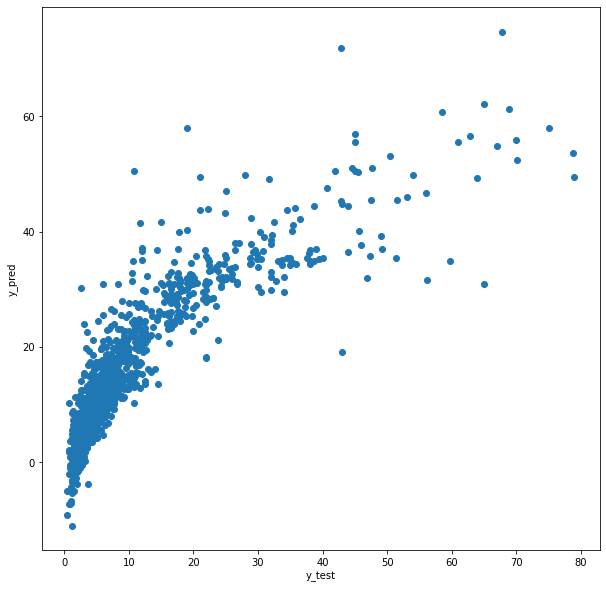

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [ ]:
df_pred=pd.DataFrame({'y_ac':y_test,'y_pred':y_pred,'difference':y_test-y_pred})
df_pred.head(10)

,y_ac,y_pred,difference
0,78.80,53.636520,25.163480
1,3.51,8.205317,-4.695317
2,6.00,15.989450,-9.989450
3,10.28,18.192146,-7.912146
4,2.35,7.961161,-5.611161
5,3.35,3.086055,0.263945
6,16.25,20.690087,-4.440087
7,8.40,12.386109,-3.986109
8,4.00,8.028278,-4.028278
9,4.50,10.499855,-5.999855


In [ ]:
dft=pd.read_csv('test-data.csv')
dummy=pd.get_dummies(dft[['Location','Fuel_Type','Transmission','Owner_Type']],drop_first=True)

In [ ]:
dft

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


In [ ]:
dfte=pd.concat([dft,dummy],axis=1)
dfte.drop(['Location','Fuel_Type','Transmission','Owner_Type'],axis=1,inplace=True)
dfte.drop(['Unnamed: 0','New_Price','Name'],axis=1,inplace=True)

In [ ]:
dfte['Mileage']=dfte['Mileage'].str.replace('kmpl','')
dfte['Mileage']=dfte['Mileage'].str.replace('km/kg','')
dfte['Engine']=dfte['Engine'].str.replace('CC','')
dfte['Engine']=dfte['Engine'].str.replace('null','0')
dfte['Power']=dfte['Power'].str.replace('bhp','')
dfte['Power']=dfte['Power'].str.replace('null','0')

In [ ]:
dfte['Mileage']=dfte['Mileage'].astype(float)
dfte['Engine']=dfte['Engine'].astype(float)
dfte['Power']=dfte['Power'].astype(float)

In [ ]:
dfte.loc[dfte.Engine==0,'Engine']=np.NaN
dfte.loc[dfte.Power==0,'Power']=np.NaN

In [ ]:
dfte['Engine']=dfte['Engine'].fillna(dfte['Engine'].mean())
dfte['Power']=dfte['Power'].fillna(dfte['Power'].mean())
dfte['Seats']=dfte['Seats'].fillna(dfte['Seats'].mode()[0])
dfte['Mileage']=dfte['Mileage'].fillna(dfte['Mileage'].mean())

In [ ]:
dfte

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2014,40929,32.26,998.0,58.20000,4.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,2013,54493,24.70,796.0,47.30000,5.0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
2,2017,34000,13.68,2393.0,147.80000,7.0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3,2012,139000,23.59,1364.0,110.38042,5.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,2014,29000,18.50,1197.0,82.85000,5.0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,2011,89411,20.54,1598.0,103.60000,5.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1230,2015,59000,17.21,1197.0,103.60000,5.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1231,2012,28000,23.08,1461.0,63.10000,5.0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
1232,2013,52262,17.20,1197.0,103.60000,5.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
v=np.zeros((1234),dtype=int)
v_df=pd.DataFrame(v)
v_df

,0
0,0
1,0
2,0
3,0
4,0
...,...
1229,0
1230,0
1231,0
1232,0


In [ ]:
dfte['Fuel_Type_Electric']=v_df

In [ ]:
dfe.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third'],
      dtype='object')

In [ ]:
dfte.set_index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third'])

,,,,,,,,,,,,,,,,,,,,,,,
Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
2014,40929,32.26,998.0,58.20000,4.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2013,54493,24.70,796.0,47.30000,5.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
2017,34000,13.68,2393.0,147.80000,7.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
2012,139000,23.59,1364.0,110.38042,5.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2014,29000,18.50,1197.0,82.85000,5.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,89411,20.54,1598.0,103.60000,5.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2015,59000,17.21,1197.0,103.60000,5.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2012,28000,23.08,1461.0,63.10000,5.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0


In [ ]:
xt_test=dfte.values

In [ ]:
xt_test1=scalar.fit_transform(xt_test)

In [ ]:
price_pred1=reg1.predict(xt_test1)
price_pred=reg.predict(xt_test)
price_df1=pd.DataFrame({'price_pred1':price_pred1,'price_pred':price_pred})
price_df1

,price_pred1,price_pred
0,0.865032,1.636838
1,2.742171,3.348957
2,13.827596,15.546577
3,1.869486,7.659030
4,5.466965,6.416816
...,...,...
1229,3.926294,6.586266
1230,10.458007,13.611309
1231,-0.168336,-0.706986
1232,10.182821,12.019161


In [ ]:
from sklearn.metrics import r2_score
r2_score(price_pred,price_pred1)

0.8997097438740799